In [1]:
# import the necessary packages
import imutils
import numpy as np
import pytesseract
import argparse
import cv2
from matplotlib import pyplot as plt

In [4]:
args = {
    'image': 'images/adhar_card.jpeg',
    'east': 'frozen_east_text_detection.pb',
    'width': 320,
    'height': 320,
    'padding': 0.0
}

In [5]:
## Match Template
img = cv2.imread('images/pan_card_9.jpeg')
tmp = cv2.imread('images/templates/logo.jpeg')
img2 = img.copy()
if tmp.shape[1] > img.shape[1]:
    ratio = img.shape[1]/tmp.shape[1]
    tmp = cv2.resize(tmp, (0,0), fx=ratio, fy=ratio) 
c, w, h = tmp.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,tmp,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [1]:
#Save Image
cv2.imwrite(filename, img)

NameError: name 'top_left' is not defined

In [ ]:
#Apply Thresholding
_, tH = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

In [ ]:
#Apply Dilation
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(tH, kernel)

In [ ]:
#Find Contour
contours, hier = cv2.findContours(tH, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, color, 3)
len(contours)

In [ ]:
# Largest Contour Rectangle
largest_area = 0
for index, cT in enumerate(contours):
        area = cv2.contourArea(cT)
        if( area > largest_area ):
            largest_area = area
            largest_contour_index = index
            boundRect = cv2.boundingRect(cT)
# print(f'Bounded Rec: {boundRect}')
cv2.drawContours(img, contours, -1, color, 2)
cv2.rectangle(img, (int(boundRect[0]), int(boundRect[1])),(int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), color, 2)
# dilation = cv2.rectangle(img, (0, 29), (271, 155), (200, 50, 0), 2)

In [ ]:
#Crop Image
crop_img = img[boundRect[1]:boundRect[1]+boundRect[3], boundRect[0]:boundRect[0]+boundRect[2]]

In [ ]:
#Display
titles = ['image', 'Threshold', 'Dilation', 'Cropped']
images = [img, tH, dilation, crop_img]
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

(232, 247)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f8ce49d9370>,
 <matplotlib.image.AxesImage at 0x7f8ce4981310>)

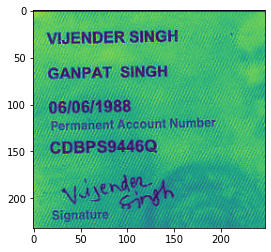

In [94]:
## Image Preprocessing
filename = 'images/crops/crop11.jpg'
c = cv2.imread(filename, 0)
print(c.shape)
plt.subplot(111),plt.imshow(c)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8ce499f9d0>,
 <matplotlib.image.AxesImage at 0x7f8ce4947d00>)

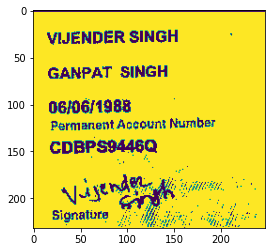

In [95]:
#Apply Thresholding
_, tH = cv2.threshold(c, 100, 255, cv2.THRESH_BINARY)
plt.subplot(111),plt.imshow(tH)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8ce4974c70>,
 <matplotlib.image.AxesImage at 0x7f8ce4912d30>)

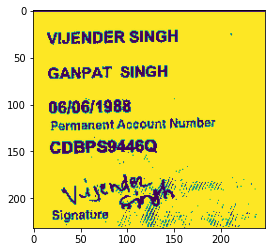

In [96]:
#Apply Bilateral Filter
img = cv2.bilateralFilter(tH,10,85,85)
plt.subplot(111),plt.imshow(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8ce492d910>,
 <matplotlib.image.AxesImage at 0x7f8ce48e8400>)

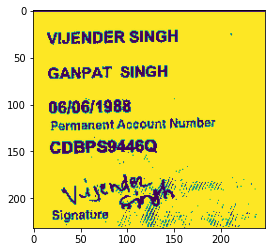

In [97]:
#Apply Dilatio
kernel = np.ones((1,1), np.uint8)
dilation = cv2.dilate(img, kernel)
plt.subplot(111),plt.imshow(dilation)

In [98]:
cv2.imwrite(filename, dilation)
dilation.shape

(232, 247)

### Id card Cropping from image

In [66]:
# show the original image and the edge detected image
# print("STEP 1: Edge Detection")
# cv2.imshow("Image", image)
# cv2.imshow("Edged", edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

STEP 1: Edge Detection


In [28]:
image = cv2.imread('images/adhar_card_hand.jpeg')

In [27]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 5, 200)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [75]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    image = cv2.drawContours(image, c, -1, (255, 0, 0), 2)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
    
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2.imshow("Outline", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

STEP 2: Find contours of paper


In [29]:
# Find countour by color range
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_blue = np.array([36,22,22])
upper_blue = np.array([180,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange (hsv, lower_blue, upper_blue)
bluecnts = cv2.findContours(mask.copy(),
                          cv2.RETR_EXTERNAL,
                          cv2.CHAIN_APPROX_SIMPLE)[-2]

if len(bluecnts)>0:
    blue_area = max(bluecnts, key=cv2.contourArea)
    (xg,yg,wg,hg) = cv2.boundingRect(blue_area)
    image = image[yg:yg+hg, xg:xg+wg]
#     cv2.rectangle(image,(xg,yg),(xg+wg, yg+hg),(0,255,0),2)
